### 필요 패키지 로드

In [13]:
from policy_scrapper import Web_scraping
from preprocessing_text import clean_text, remove_stopwords, extract_nouns
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [14]:
# 데이터 로드
lg_df = pd.read_csv('Lg_review.csv')

In [15]:
# 불용어가 저장되어 있는 텍스트 파일 로드
file_path = 'stopword.txt'

# 불용어 파일을 읽어서 set 형태로 저장
with open(file_path, 'r', encoding='utf-8') as f:
    stopwords = set([word.strip() for word in f.readlines()])

In [16]:
# 평점 4점을 기준으로 4점 이상이면 긍정, 미만이면 부정으로 분류

lg_pos = lg_df[lg_df['rating']>= 4.0]
lg_neg = lg_df[lg_df['rating'] < 4.0]

### 긍정 리뷰 데이터의 시각화

In [17]:
# 텍스트 데이터에서의 특수 기호 제거
lg_pos['cleaned_review'] = lg_pos['review'].apply(clean_text)

# 불용어 제거
lg_pos['processed_review'] = lg_pos['cleaned_review'].apply(lambda x: remove_stopwords(x, stopwords))

# 명사 추출
lg_pos['nouns'] = lg_pos['processed_review'].apply(extract_nouns)

In [19]:
# 모든 명사 정보 리스트화
all_nouns_list = lg_pos['nouns'].sum()

# 명사형 정보의 집합
word_counts = Counter(all_nouns_list)

# top 100개의 빈도수만을 추출
top_100_words = dict(word_counts.most_common(100))

### 워드클라우드 시각화

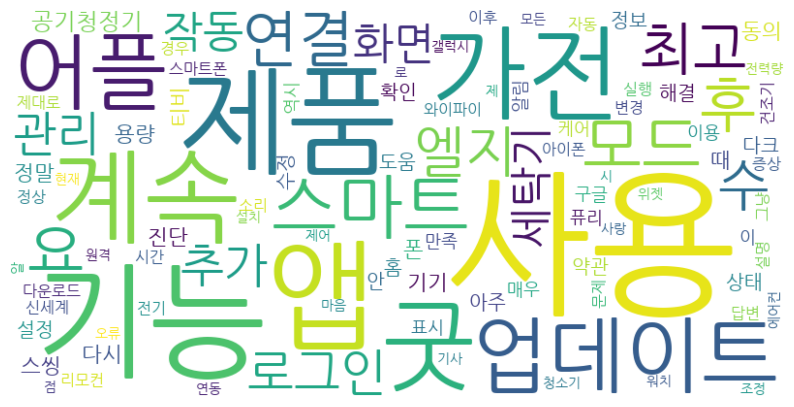

In [20]:
# Generate a word cloud image
wordcloud = WordCloud(font_path = 'NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 부정 데이터의 시각화

In [21]:
# 텍스트 데이터에서의 특수 기호 제거
lg_neg['cleaned_review'] = lg_neg['review'].apply(clean_text)

# 불용어 제거
lg_neg['processed_review'] = lg_neg['cleaned_review'].apply(lambda x: remove_stopwords(x, stopwords))

# 명사 추출
lg_neg['nouns'] = lg_neg['processed_review'].apply(extract_nouns)

In [22]:
# 모든 명사 정보 리스트화
all_nouns_list = lg_neg['nouns'].sum()

# 명사형 정보의 집합
word_counts = Counter(all_nouns_list)

# top 100개의 빈도수만을 추출
top_100_words = dict(word_counts.most_common(100))

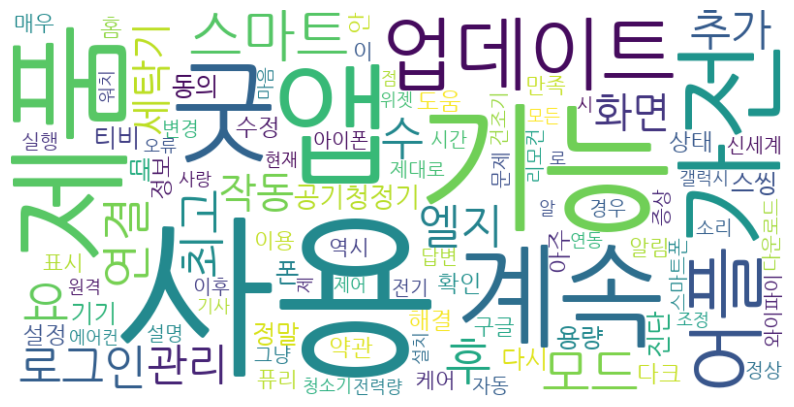

In [59]:
# Generate a word cloud image
wordcloud = WordCloud(font_path = 'NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()